<a href="https://colab.research.google.com/github/JSEFERINO/Estadistica_Moderna/blob/main/51_C_Datos_A_E_Datos_ACP3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Curso Teoría de Probabilidad por Julio Hurtado Márquez**
## **Parte XIII- Análisis Exploratorio de Datos**
# **Librerias para usar en esta parte del curso**

In [ ]:
# **Librerias para usar en esta parte del cursor**
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # para visualizacion de datos
%matplotlib inline
import seaborn as sns # para visualizacion de datos
from scipy import stats
import warnings # Para ignorar todas las advertencias
warnings.filterwarnings("ignore", category=FutureWarning)
from sympy.functions.combinatorial.factorials import factorial
import math
from math import sqrt
from numpy.ma.core import log
from sympy import integrate, init_printing
from sympy.abc import x
print("Setup Complete")

Setup Complete


# **218. Parte I: Ejemplo 1.  Análisis de Componentes Princiapales (PCA) - Análisis Exploratorio de Datos**

# **a. Base de datos - PCA**

In [ ]:
# **a. Base de datos - PCA**
datos=pd.read_csv("/content/df_datos_LIMPIOS.csv",delimiter=';')
datos

,CURSO,DEFINITIVA,PROGRAMA,EDAD,URBANO,PESO,ESTATURA,SATISFACC,SABER 11,PROMEDIO,SEXO,ESTRATO,Herramientas
0,ESTADISTICA I,43,COMS,18,SI,55,164,4,350,426,F,II,PTWF
1,ESTADISTICA I,31,COMS,19,SI,65,165,5,328,411,F,I,CYDT
2,ESTADISTICA I,42,DERH,25,NO,56,170,5,285,37,M,I,CYDT
3,ESTADISTICA I,36,DERH,23,SI,65,170,5,280,41,F,II,PCWF
4,ESTADISTICA I,39,PSIC,19,SI,50,169,5,319,40,F,II,CYWF
...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,ESTADISTICA I,35,PSIC,18,SI,60,163,5,310,39,F,III,PTWF
117,ESTADISTICA I,35,PSIC,18,SI,60,180,3,346,39,M,IV,PCWF
118,ESTADISTICA I,25,COMS,21,NO,45,172,5,221,37,F,II,CYWF
119,ESTADISTICA I,30,COMS,20,NO,50,160,4,332,35,F,II,CYDT


# **b. Todas las columnas a trabajar y dimension de la data**

In [ ]:
# **b. Todas las columnas a trabajar**
datos.columns

Index(['CURSO', 'DEFINITIVA', 'PROGRAMA', 'EDAD', 'URBANO', 'PESO', 'ESTATURA',
       'SATISFACC', 'SABER 11', 'PROMEDIO', 'SEXO', 'ESTRATO', 'Herramientas'],
      dtype='object')

In [ ]:
# **b. La dimensión de la data**
datos.shape

(121, 13)

# **c. Veamos si contiene datos perdidos**

In [ ]:
# **c. Veamos si contiene datos perdidos**
datos.isnull().sum()

CURSO           0
DEFINITIVA      0
PROGRAMA        0
EDAD            0
URBANO          0
PESO            0
ESTATURA        0
SATISFACC       0
SABER 11        0
PROMEDIO        0
SEXO            0
ESTRATO         0
Herramientas    0
dtype: int64

# **d. Veamos si contiene datos perdidos**
+ Como en la parte _c_ no se observan todas las variables, sumamos todos los resultado y no tenemos un problema de imputacion de datos

In [ ]:
# **d. Veamos si contiene datos perdidos**
datos.isnull().sum().sum()

0

# **e. Preguntemonos si hay correlación entre las variables**

In [ ]:
# **e. Preguntemonos si hay correlación entre las variables**
datos.corr()

,DEFINITIVA,EDAD,PESO,ESTATURA,SATISFACC,SABER 11,PROMEDIO
DEFINITIVA,1.000000,-0.257484,-0.142738,0.008412,0.085619,0.142324,0.457366
EDAD,-0.257484,1.000000,0.222894,-0.086632,-0.055683,-0.320182,-0.391353
PESO,-0.142738,0.222894,1.000000,0.435273,0.075739,-0.013083,-0.091824
ESTATURA,0.008412,-0.086632,0.435273,1.000000,-0.044383,0.297443,0.015706
SATISFACC,0.085619,-0.055683,0.075739,-0.044383,1.000000,-0.181282,0.104541
SABER 11,0.142324,-0.320182,-0.013083,0.297443,-0.181282,1.000000,0.390916
PROMEDIO,0.457366,-0.391353,-0.091824,0.015706,0.104541,0.390916,1.000000


# **f. Triangulo de correlación y mapa de calor - Heatmap**
+ **La evidencia de una fuerte correlacion entre las variables es un indicio de que hay que usar el métodos de componentes principales**

<ipython-input-36-f64e4c6237c7>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(datos.corr(), dtype=np.bool))


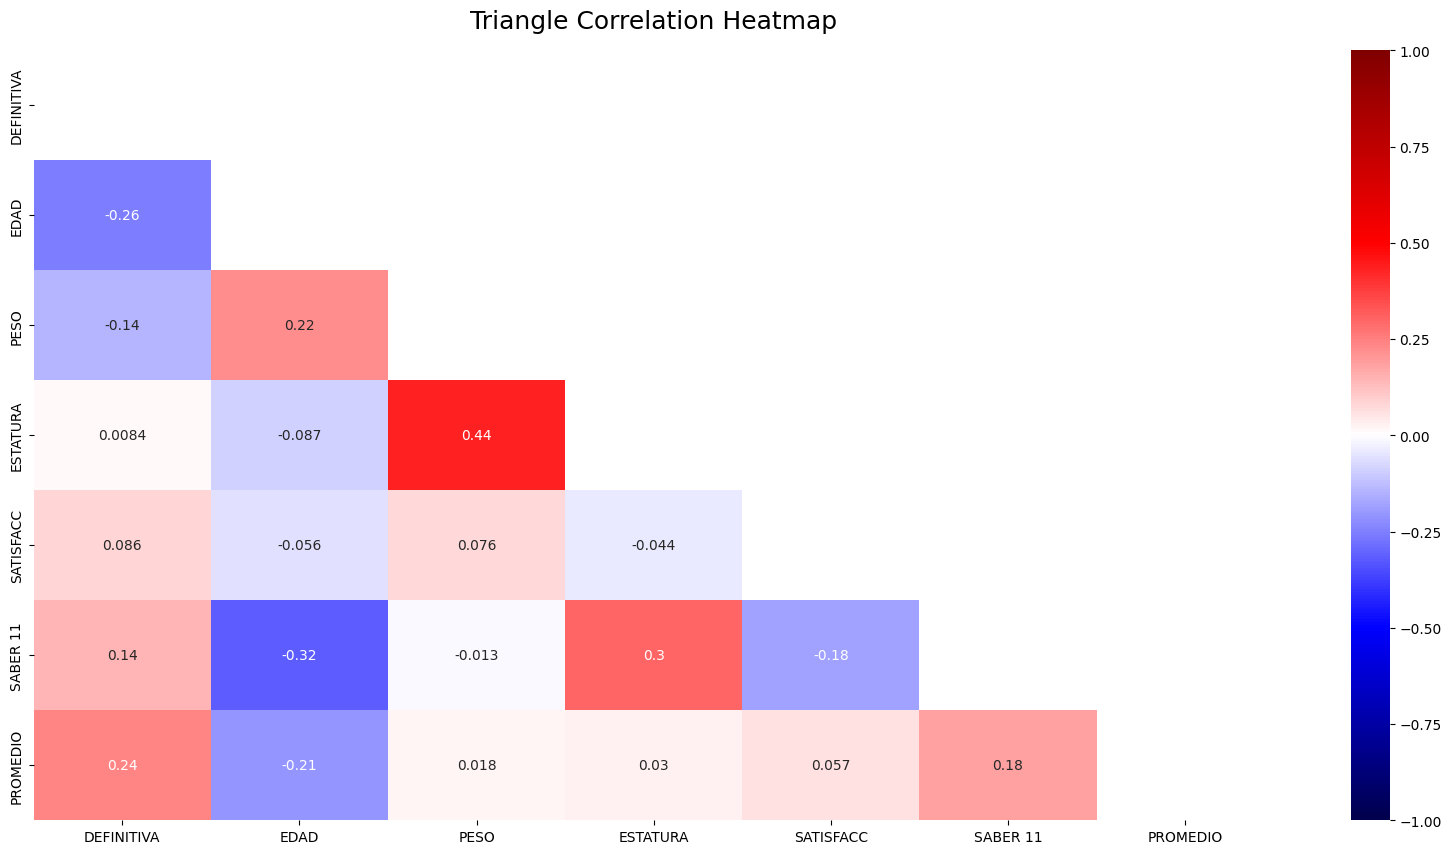

In [ ]:
# **f. Triangulo de correlación y mapa de calor - Heatmap**
plt.figure(figsize=(20,10))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(datos.corr(), dtype=np.bool))
heatmap = sns.heatmap(datos.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='seismic')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);
plt.show()

# **g. Matriz de Covarianza**

In [ ]:
datos.cov()

,DEFINITIVA,EDAD,PESO,ESTATURA,SATISFACC,SABER 11,PROMEDIO
DEFINITIVA,74.646143,-3.677342,-15.952755,0.899036,0.468251,52.947934,377.225895
EDAD,-3.677342,2.732507,4.766185,-1.771419,-0.058264,-22.789945,-63.768802
PESO,-15.952755,4.766185,167.333747,69.649311,0.620179,-7.287190,43.149449
ESTATURA,0.899036,-1.771419,69.649311,153.012259,-0.347521,158.428650,69.214807
SATISFACC,0.468251,-0.058264,0.620179,-0.347521,0.400689,-4.941116,6.653650
SABER 11,52.947934,-22.789945,-7.287190,158.428650,-4.941116,1854.097107,1435.491253
PROMEDIO,377.225895,-63.768802,43.149449,69.214807,6.653650,1435.491253,34269.278512


# **j. Valores propios y vectores propios**

In [ ]:
from numpy.linalg import eig
valores, vectores = eig(datos.cov())
print(pd.DataFrame({'valores_propios':valores}))

print({'vectores_propios':vectores})

   valores_propios
0     34337.267587
1      1806.225882
2       225.845353
3        84.929067
4        64.700765
5         2.161481
6         0.370830
{'vectores_propios': array([[-1.10663069e-02, -2.08146635e-02,  9.48364386e-02,
        -4.22323784e-01,  9.00599525e-01, -3.11529556e-02,
        -6.55338342e-03],
       [ 1.88579143e-03,  1.11332207e-02, -1.84459498e-02,
         4.20559861e-02, -1.21103719e-02, -9.97027970e-01,
         5.95995224e-02],
       [-1.25117232e-03,  1.85890573e-03, -7.75236889e-01,
         5.35271236e-01,  3.33743482e-01,  3.24694841e-02,
        -6.96205374e-03],
       [-2.23031651e-03, -9.33750021e-02, -6.21832671e-01,
        -7.26069295e-01, -2.77740424e-01, -1.66354530e-02,
         2.67593907e-03],
       [-1.87370864e-04,  2.89731153e-03, -2.20485059e-03,
         1.25399053e-04,  9.68161182e-03,  5.96280952e-02,
         9.98167045e-01],
       [-4.41757016e-02, -9.94353105e-01,  5.46948062e-02,
         7.85938670e-02,  7.29343710e-03, -8.766

# **219. Parte II: Ejemplo 1.  Aplicando el Análisis de Componentes Princiapales (PCA) - Análisis Exploratorio de Datos**

# **a. Reorganicemos los datos**

In [ ]:
datos.columns

Index(['CURSO', 'DEFINITIVA', 'PROGRAMA', 'EDAD', 'URBANO', 'PESO', 'ESTATURA',
       'SATISFACC', 'SABER 11', 'PROMEDIO', 'SEXO', 'ESTRATO', 'Herramientas'],
      dtype='object')

In [ ]:
X = datos.loc[:, ["DEFINITIVA", "EDAD", "PESO", "ESTATURA", 'SATISFACC', 'PROMEDIO','SABER 11']]
Y1 = datos.loc[:, ["CURSO"]]
Y2 = datos.loc[:, ["PROGRAMA"]]
Y3 = datos.loc[:, ["URBANO"]]
Y4 = datos.loc[:, ["SEXO"]]
Y5 = datos.loc[:, ["ESTRATO"]]

# **b. Estandarizamos o escalamos las variables para datos_test**

In [ ]:
# **b. Estandarizamos o escalamos las variables para datos_test**

from sklearn.preprocessing import StandardScaler # Nuestra libreria para el PCA
std = StandardScaler() # Objeto de la clase StandarScaler tomara por defecto with_mean =0(True) y with_std =1(True)
X_std = std.fit_transform(X) # hace lo solicitado a la base de datos
X_std

# **c. Usamos la libreria donde esta la componente principal**

In [ ]:
# **c. Usamos la libreria donde esta la componente principal**
from sklearn.decomposition import PCA

# Creamos un gráfico para que nos diga cuantas componentes queremos

PCA = PCA() # n_components = 2

# Obtenemos los componentes principales

X_std_pca = PCA.fit(X_std) # hace lo solicitado a la base de datos

# veamos lo que hizo
X_std_pca

PCA()

# **d. Cuanta varianza corresponde a cada componente**

In [ ]:
# **d. Cuanta varianza corresponde a cada componente**
X_std_pca.explained_variance_ratio_.shape # nos muestra la misma cantidad de variables

(7,)

In [ ]:
# **d. Cuanta varianza corresponde a cada componente**
print(X_std_pca.explained_variance_ratio_) # nos muestra la misma cantidad de variables

[0.24984368 0.21708883 0.16514954 0.12031823 0.10607946 0.07963838
 0.06188188]


In [ ]:
# **d. Varianza y varianza acumulada por las nuevas componentes principales**
var_exp = pd.DataFrame({'Varianza':X_std_pca.explained_variance_ratio_, 'Varianza_acumulada':np.cumsum(X_std_pca.explained_variance_ratio_)})
var_exp

,Varianza,Varianza_acumulada
0,0.249844,0.249844
1,0.217089,0.466933
2,0.165150,0.632082
3,0.120318,0.752400
4,0.106079,0.858480
5,0.079638,0.938118
6,0.061882,1.000000


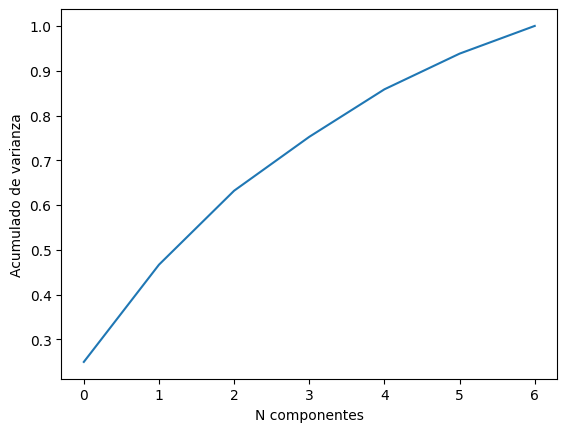

In [ ]:
# **d. Cuanta varianza corresponde a cada componente**
var_exp = np.cumsum(X_std_pca.explained_variance_ratio_)# Esta es la varianza explicada
plt.plot(var_exp)
plt.xlabel('N componentes')
plt.ylabel('Acumulado de varianza')
plt.show()

# **e. Queremos saber cuantas componentes necesitamos**

In [ ]:
# **e. Queremos saber cuantas componentes necesitamos**
print('Cuantas componentes me explican mas del 60% de la varianza pero menos del 70%', np.where((var_exp>0.6)&(var_exp<0.7)))
print('Cuantas componentes me explican mas del 60% de la varianza pero menos del 80%', np.where((var_exp>0.6)&(var_exp<0.8)))
print('Cuantas componentes me explican mas del 60% de la varianza pero menos del 95%', np.where((var_exp>0.6)&(var_exp<0.90)))

Cuantas componentes me explican mas del 60% de la varianza pero menos del 70% (array([2]),)
Cuantas componentes me explican mas del 60% de la varianza pero menos del 80% (array([2, 3]),)
Cuantas componentes me explican mas del 60% de la varianza pero menos del 95% (array([2, 3, 4]),)


# **f. Usamos la libreria donde esta la componente principal**

In [ ]:
# **f. Usamos la libreria donde esta la componente principal**

from sklearn.decomposition import PCA

# Creamos un gráfico para que nos diga cuantas componentes queremos

pca = PCA(n_components = 2) # n_components = 2

# Obtenemos los componentes principales

X_std_pca2 = pca.fit_transform(X_std) # hace lo solicitado a la base de datos

# veamos lo que hizo nos da dos nuevas columnas
X_std_pca2

array([[-1.54736033,  0.52546408],
       [-0.18370993, -0.15934278],
       [ 2.44333933, -0.08801665],
       [ 2.21956121, -0.47827338],
       [ 0.14713054,  0.58138375],
       [ 1.79551689, -0.95875273],
       [-0.8247584 , -2.23634304],
       [ 0.88187837,  1.15787845],
       [ 0.06948475,  1.19534873],
       [-0.04834265, -1.45759918],
       [-2.06404125, -0.41511703],
       [-0.83051242, -0.45830346],
       [-0.48203241,  0.45405586],
       [-1.24313437,  0.39499923],
       [ 0.42368157,  1.04590238],
       [ 1.13753106, -1.53658393],
       [-1.60902319,  0.59087972],
       [-0.49486932, -1.12456532],
       [-0.00923369, -0.77468359],
       [ 0.21174765, -1.57706576],
       [ 1.52351373,  0.8338027 ],
       [ 0.28783196,  1.22215192],
       [-1.96463309, -1.34059224],
       [-1.63162629, -0.98893878],
       [-1.90961221,  1.59428496],
       [-0.07597257, -1.40346157],
       [ 1.68262195,  0.24619746],
       [ 0.8328054 ,  0.97491015],
       [-1.31135264,

# **g. Las dimensiones de la matriz**

In [ ]:
# **g. Las dimensiones de la matriz**
X_std_pca2.shape # Tenemos menos variables que las originales

(121, 2)

# **h. Varianza explicada por las componentes elegidas**

In [ ]:
# **h. Varianza explicada por las componentes elegidas**
print('Cuanto explica cada componente elegida',pca.explained_variance_ratio_)
print( 'Cuanto explica la suma de las componentes elegidas', np.sum(pca.explained_variance_ratio_))

Cuanto explica cada componente elegida [0.24984368 0.21708883]
Cuanto explica la suma de las componentes elegidas 0.4669325143749979


# **i. Cantidad de variables de las originales**

In [ ]:
# **i. Cantidad de variables de las originales**
pca.components_# Pesos o coeficientes que nos muestra cuanto de cada variable original tienen nuestras nuevas variables

array([[-0.44049592,  0.54777238,  0.11955191, -0.2221361 ,  0.02719336,
        -0.41915934, -0.51559444],
       [ 0.21177751, -0.15547306, -0.65705624, -0.66010703,  0.09591443,
         0.02757086, -0.23141842]])

In [ ]:
# **i. Cantidad de variables de las originales**
pca.components_.shape # Nos muestra que son tres variables combinado las 9

(2, 7)

# **j. Varianza acumulada**

In [ ]:
# **j. Varianza acumulada**
cumVar = pd.DataFrame(np.cumsum(pca.explained_variance_ratio_)*100,
                      columns=["cumVarPerc"])
expVar = pd.DataFrame(pca.explained_variance_ratio_*100, columns=["VarPerc"])
pd.concat([expVar, cumVar], axis=1)\
    .rename(index={0: "PC1", 1: "PC2"})

,VarPerc,cumVarPerc
PC1,24.984368,24.984368
PC2,21.708883,46.693251


In [ ]:
X = datos.loc[:, ["DEFINITIVA", "EDAD", "PESO", "ESTATURA", 'SATISFACC', 'PROMEDIO','SABER 11']]
Y1 = datos.loc[:, ["CURSO"]]
Y2 = datos.loc[:, ["PROGRAMA"]]
Y3 = datos.loc[:, ["URBANO"]]
Y4 = datos.loc[:, ["SEXO"]]
Y5 = datos.loc[:, ["ESTRATO"]]

# **k. Visualización**
+ En este apartado vamos a realizar dos gráficos para visualizar: un diagrama de dispersión y un biplot.

+ El diagrama de dispersión nos sirve para ver los valores de las observaciones respecto de los dos componentes principales y resaltamos las diferentes observaciones por su especie.

<Axes: xlabel='PC1', ylabel='PC2'>

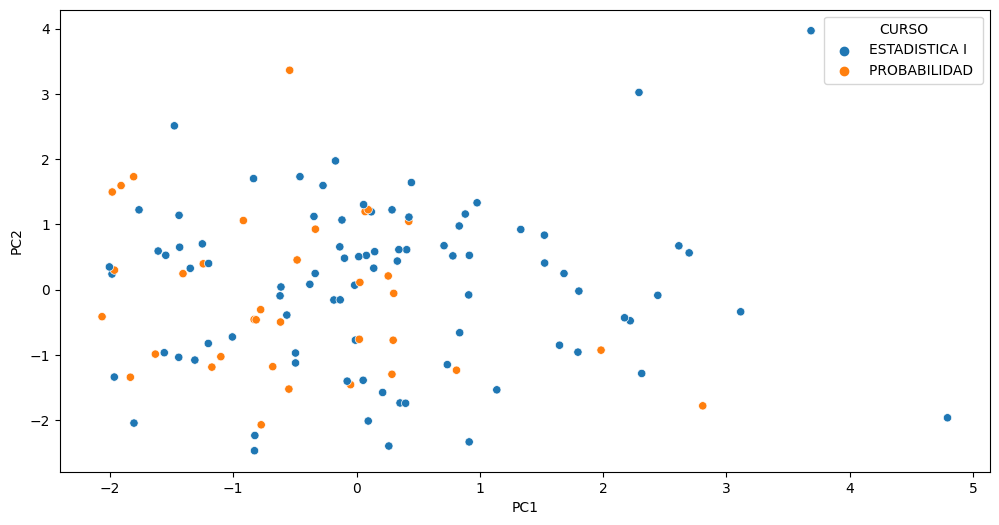

In [ ]:
# **k. Visualización**
componentsDf = pd.DataFrame(data = X_std_pca2, columns = ['PC1', 'PC2'])
pcaDf = pd.concat([componentsDf, Y1], axis=1)

plt.figure(figsize=(12, 6))
sns.scatterplot(data=pcaDf, x="PC1", y="PC2", hue="CURSO")

<Axes: xlabel='PC1', ylabel='PC2'>

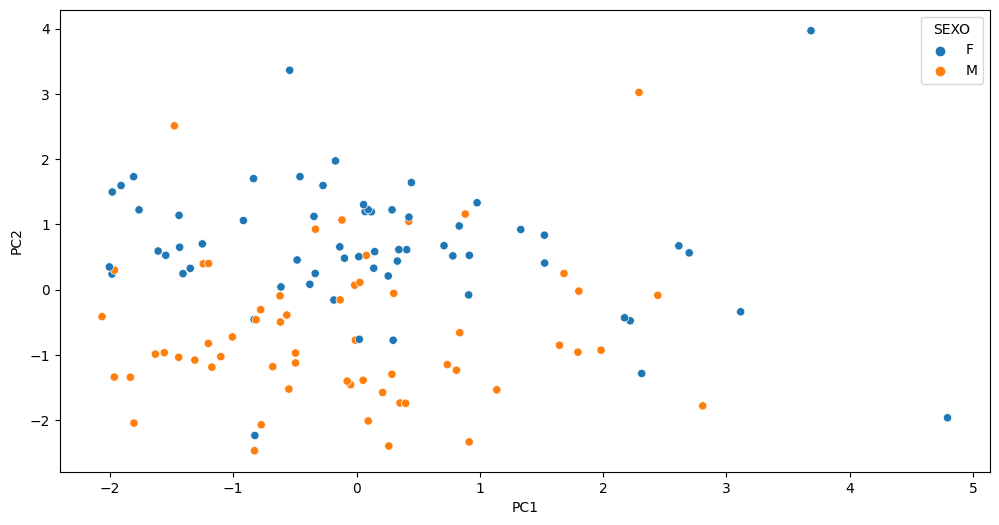

In [ ]:
# **k. Visualización**
componentsDf = pd.DataFrame(data = X_std_pca2, columns = ['PC1', 'PC2'])
pcaDf = pd.concat([componentsDf, Y4], axis=1)

plt.figure(figsize=(12, 6))
sns.scatterplot(data=pcaDf, x="PC1", y="PC2", hue="SEXO")

<Axes: xlabel='PC1', ylabel='PC2'>

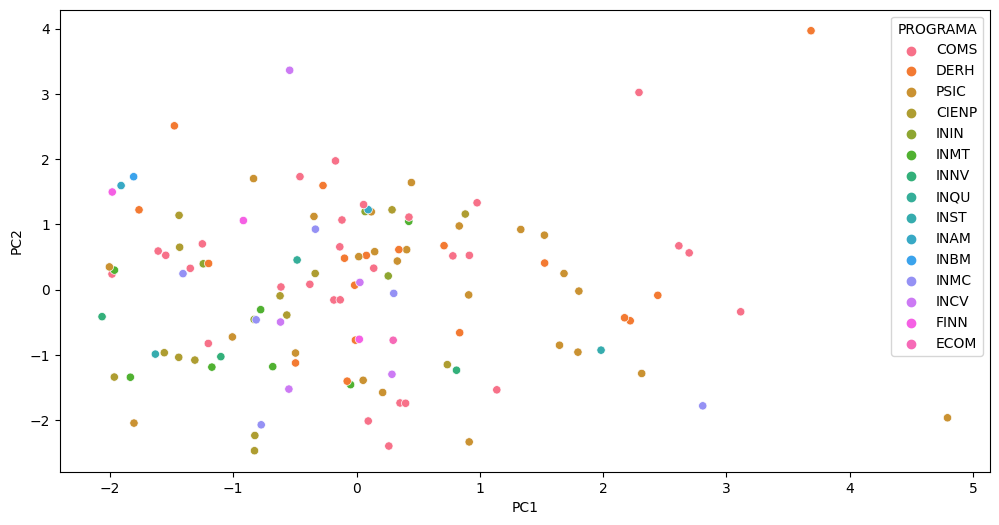

In [ ]:
# **k. Visualización**
componentsDf = pd.DataFrame(data = X_std_pca2, columns = ['PC1', 'PC2'])
pcaDf = pd.concat([componentsDf, Y2], axis=1)

plt.figure(figsize=(12, 6))
sns.scatterplot(data=pcaDf, x="PC1", y="PC2", hue="PROGRAMA")

# **l. Biplot**
+ El biplot es un gráfico que permite representar las variables del dataset original y las observaciones transformadas en los ejes de los dos componentes principales.
+ Las flechas representan las variables originales y es importante hacia dónde apuntan.
+ La dirección y el sentido indican el peso y el signo de las variables originales en los dos componentes principales.

+ Varias cosas que podemos comentar sobre las flechas son:

 - Dos flechas que tienen dirección y sentido semejantes indica una correlación positiva.
 -  Dos flechas que tienen la misma dirección pero sentidos diferentes indican una correlación negativa.
 - Un ángulo recto (90º) entre dos flechas indica no correlación entre ellas.
 - Un ángulo llano (180º) entre dos flechas indica correlación negativa perfecta.
 - Para calcular el biplot necesitamos definir antes la función que realizará el plot, para después mostrar el gráfico.

In [ ]:
# **l. Biplot**
def biplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley,s=5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')

    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

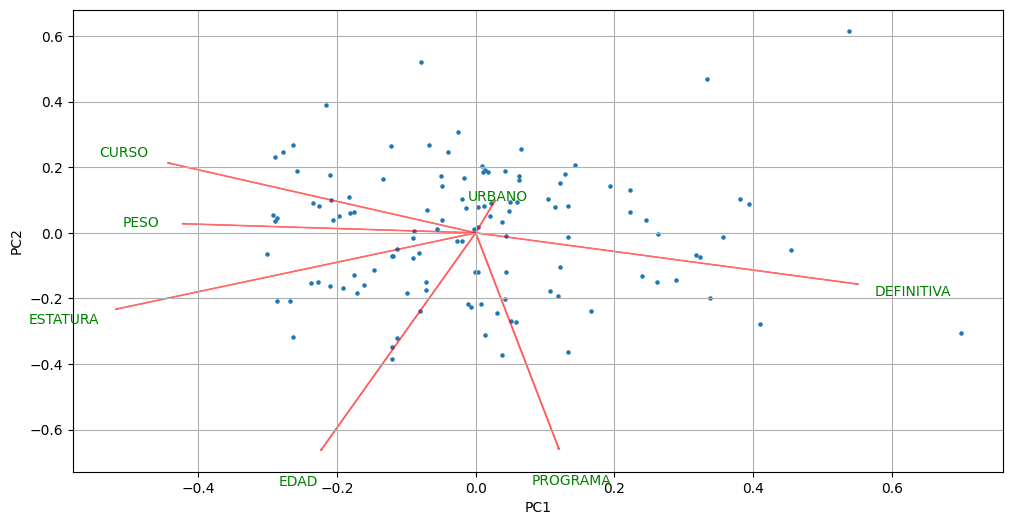

In [ ]:
plt.figure(figsize=(12, 6))
biplot(X_std_pca2, np.transpose(pca.components_), list(datos.columns))

# **m. Cantidad de variables de las originales tiene cada componente**

+ **Variables**

+ **Cualitativas**
 - Y1 = datos.loc[:, ["CURSO"]]
 - Y2 = datos.loc[:, ["PROGRAMA"]]
 - Y3 = datos.loc[:, ["URBANO"]]
 - Y4 = datos.loc[:, ["SEXO"]]
 - Y5 = datos.loc[:, ["ESTRATO"]]

+ **Cualitativas**
 - $X_1=$'DEFINITIVA',
 - $X_2=$'EDAD',
 - $X_3=$'PESO',
 - $X_4=$'ESTATURA',
 - $X_5=$  'SATISFACC',
 - $X_6=$'PROMEDIO'
 - $X_7=$'SABER 11'
+ La primera fila es la nueva variable que llamaremos

 - $$PC1=-0.44049592X_1+  0.54777238X_2+ 0.11955191X_3 -0.2221361X_4+  0.02719336X_5-0.41915934X_6 -0.51559444X_7$$

 - $$$PC2= 0.21177751X_1 -0.15547306X_2 -0.65705624X_3 -0.66010703X_4+  0.09591443X_5+0.02757086 X_6-0.23141842X_7$$

In [ ]:
# **m. Cantidad de variables de las originales tiene cada componente**
pca.components_#

array([[-0.44049592,  0.54777238,  0.11955191, -0.2221361 ,  0.02719336,
        -0.41915934, -0.51559444],
       [ 0.21177751, -0.15547306, -0.65705624, -0.66010703,  0.09591443,
         0.02757086, -0.23141842]])

In [ ]:
# **m. Cantidad de variables de las originales tiene cada componente**
pca.components_.shape

(2, 7)

In [ ]:
# **m. Cantidad de variables de las originales tiene cada componente**
pca.components_.T

array([[-0.44049592,  0.21177751],
       [ 0.54777238, -0.15547306],
       [ 0.11955191, -0.65705624],
       [-0.2221361 , -0.66010703],
       [ 0.02719336,  0.09591443],
       [-0.41915934,  0.02757086],
       [-0.51559444, -0.23141842]])

In [ ]:
# **m. Cantidad de variables de las originales tiene cada componente**
pca.components_.T.shape # Otra vez chequeamos las dimensones de nuestras matrices

(7, 2)

In [ ]:
# **m. Cantidad de variables de las originales tiene cada componente**
pd.DataFrame(pca.components_.T)
list_namepca = [f'PC{i}' for i in range(1,3)]
df_pca_loading = pd.DataFrame(pca.components_.T, columns = list_namepca)
df_pca_loading

,PC1,PC2
0,-0.440496,0.211778
1,0.547772,-0.155473
2,0.119552,-0.657056
3,-0.222136,-0.660107
4,0.027193,0.095914
5,-0.419159,0.027571
6,-0.515594,-0.231418


In [ ]:
# **n. Comprobando que se cumple las hipotesis acerca delos coeficientes**
print('La suma de los coeficientes PC1 es igual a =',df_pca_loading[['PC1']].apply(lambda x:sum(x**2)))
print('La suma de los coeficientes PC2 es igual a =',df_pca_loading[['PC2']].apply(lambda x:sum(x**2)))

La suma de los coeficientes PC1 es igual a = PC1    1.0
dtype: float64
La suma de los coeficientes PC2 es igual a = PC2    1.0
dtype: float64
